# 1. 데이터 정제: 데이터 기초통계 확인 및 결측치 제거

In [147]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [149]:
df = pd.read_csv('superstore.csv')
df
#결측치 제거 및 칼럼 확인 
df.drop(columns = ['记录数'], inplace=True)
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [151]:
import pandas as pd

# 주문 날짜와 배송 날짜(문자열)을 datetime으로 변환하여 배송소요시간 칼럼 추가
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

# 시간 차이 계산
df['Shipping.Duration'] = df['Ship.Date'] - df['Order.Date']

print(df[['Order.Date', 'Ship.Date', 'Shipping.Duration']])
print(type(df['Shipping.Duration'][0]))  # <class 'pandas._libs.tslibs.timedeltas.Timedelta'>

df['Shipping.Duration.Days'] = df['Shipping.Duration'].dt.days
print(df[['Shipping.Duration', 'Shipping.Duration.Days']])

      Order.Date  Ship.Date Shipping.Duration
0     2011-01-07 2011-01-09            2 days
1     2011-01-21 2011-01-26            5 days
2     2011-08-05 2011-08-09            4 days
3     2011-08-05 2011-08-09            4 days
4     2011-09-29 2011-10-03            4 days
...          ...        ...               ...
51285 2014-12-03 2014-12-04            1 days
51286 2014-12-03 2014-12-04            1 days
51287 2014-12-18 2014-12-21            3 days
51288 2014-12-25 2014-12-26            1 days
51289 2014-12-26 2014-12-30            4 days

[51290 rows x 3 columns]
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>
      Shipping.Duration  Shipping.Duration.Days
0                2 days                       2
1                5 days                       5
2                4 days                       4
3                4 days                       4
4                4 days                       4
...                 ...                     ...
51285            1 days            

In [153]:
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum,Shipping.Duration,Shipping.Duration.Days
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,2011-01-07,CA-2011-130813,High,...,2011-01-09,Second Class,4.37,California,Paper,2011,North America,2,2 days,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,2011-01-21,CA-2011-148614,Medium,...,2011-01-26,Standard Class,0.94,California,Paper,2011,North America,4,5 days,5
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05,CA-2011-118962,Medium,...,2011-08-09,Standard Class,1.81,California,Paper,2011,North America,32,4 days,4
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05,CA-2011-118962,Medium,...,2011-08-09,Standard Class,4.59,California,Paper,2011,North America,32,4 days,4
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,2011-09-29,CA-2011-146969,High,...,2011-10-03,Standard Class,1.32,California,Paper,2011,North America,40,4 days,4


In [155]:
#null값 결측치 확인 
print(df.isnull().sum()) 

Category                  0
City                      0
Country                   0
Customer.ID               0
Customer.Name             0
Discount                  0
Market                    0
Order.Date                0
Order.ID                  0
Order.Priority            0
Product.ID                0
Product.Name              0
Profit                    0
Quantity                  0
Region                    0
Row.ID                    0
Sales                     0
Segment                   0
Ship.Date                 0
Ship.Mode                 0
Shipping.Cost             0
State                     0
Sub.Category              0
Year                      0
Market2                   0
weeknum                   0
Shipping.Duration         0
Shipping.Duration.Days    0
dtype: int64


# 3. 대륙 및 나라별 이익분석

In [182]:
df = pd.read_csv('superstore.csv')
df_copy = df[['Market', 'Sales', 'Profit']].copy()
df_copy=df_copy.dropna()

grouped_data = df_copy.groupby('Market')[['Sales', 'Profit']].agg(['sum', 'mean'])

grouped_data['Profit/Sales(%)'] = grouped_data[('Profit', 'sum')] / grouped_data[('Sales', 'sum')]*100
grouped_data['Profit/Sales(%)'] = grouped_data[('Profit', 'mean')] / grouped_data[('Sales', 'mean')]*100

print(grouped_data.applymap(lambda x: "{:.0f}".format(x))) #applymap으로 소수점 이하 버림표기

          Sales       Profit      Profit/Sales(%)
            sum mean     sum mean                
Market                                           
APAC    3585833  326  436000   40              12
Africa   783776  171   88872   19              11
Canada    66932  174   17817   46              27
EMEA     806184  160   43898    9               5
EU      2938139  294  372830   37              13
LATAM   2164687  210  221643   22              10
US      2297354  230  286397   29              12


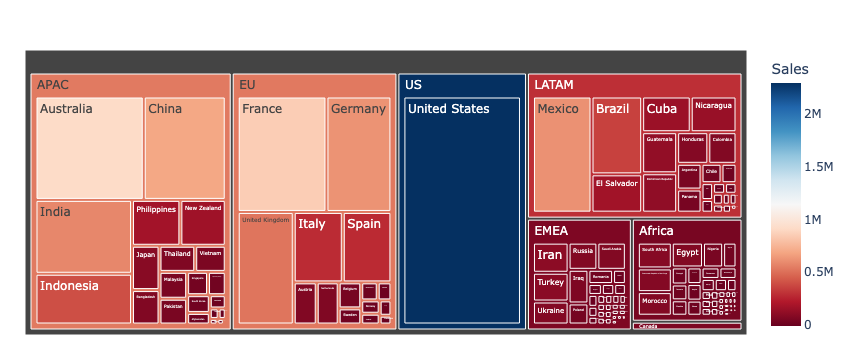

In [194]:
#판매액 기준 트리맵 - 미국 포함 
import plotly.express as px
import numpy as np
temp = df[['Market','Country','Sales']].groupby(['Market','Country'])['Sales'].sum().reset_index()
fig = px.treemap(temp,path=['Market','Country'], values='Sales',
                  color='Sales', hover_data=['Market','Country','Sales'], color_continuous_scale='RdBu')

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
#color_discrete_sequence = px.colors.qualitative.Plotly)fig.data[0].textinfo = 'label+text+value'fig.show()

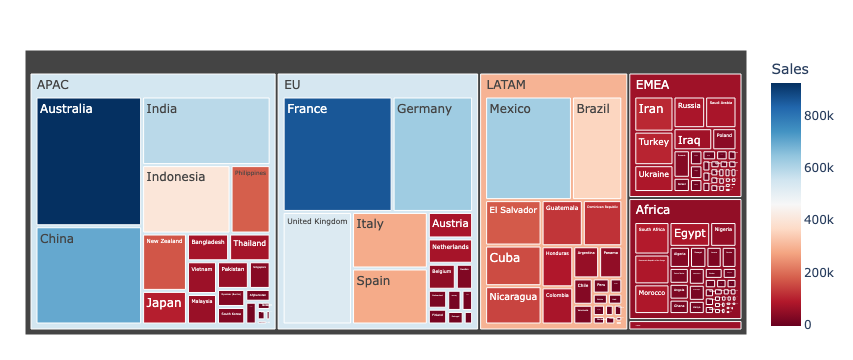

In [186]:
#판매액 기준 트리맵 - 미국 제외
import plotly.express as px
import numpy as np

temp2 = df[df['Market'] != 'US'][['Market','Country','Sales']].groupby(['Market','Country'])['Sales'].sum().reset_index()

fig = px.treemap(temp2,path=['Market','Country'], values='Sales',
                  color='Sales', hover_data=['Market','Country','Sales'], color_continuous_scale='RdBu')

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
#color_discrete_sequence = px.colors.qualitative.Plotly)fig.data[0].textinfo = 'label+text+value'fig.show()

             Country  Customer Count  Order Count  Sales Sum   Profit Sum  \
0        Afghanistan              25           26      21674    5460.3000   
1          Australia             660         1420     925257  103907.4330   
2         Bangladesh              76           82      78254   19430.8900   
3           Cambodia              21           21      17476    4476.5400   
4              China             549          925     700591  150683.0850   
5          Hong Kong               9            9       6148    1558.1100   
6              India             494          785     589664  129071.8350   
7          Indonesia             469          698     404887   15608.6779   
8              Japan             124          128     100789   24328.4670   
9           Malaysia              81           82      61363   16329.9600   
10          Mongolia               1            1         40     -17.0100   
11   Myanmar (Burma)              56           58      34144   -2109.2583   

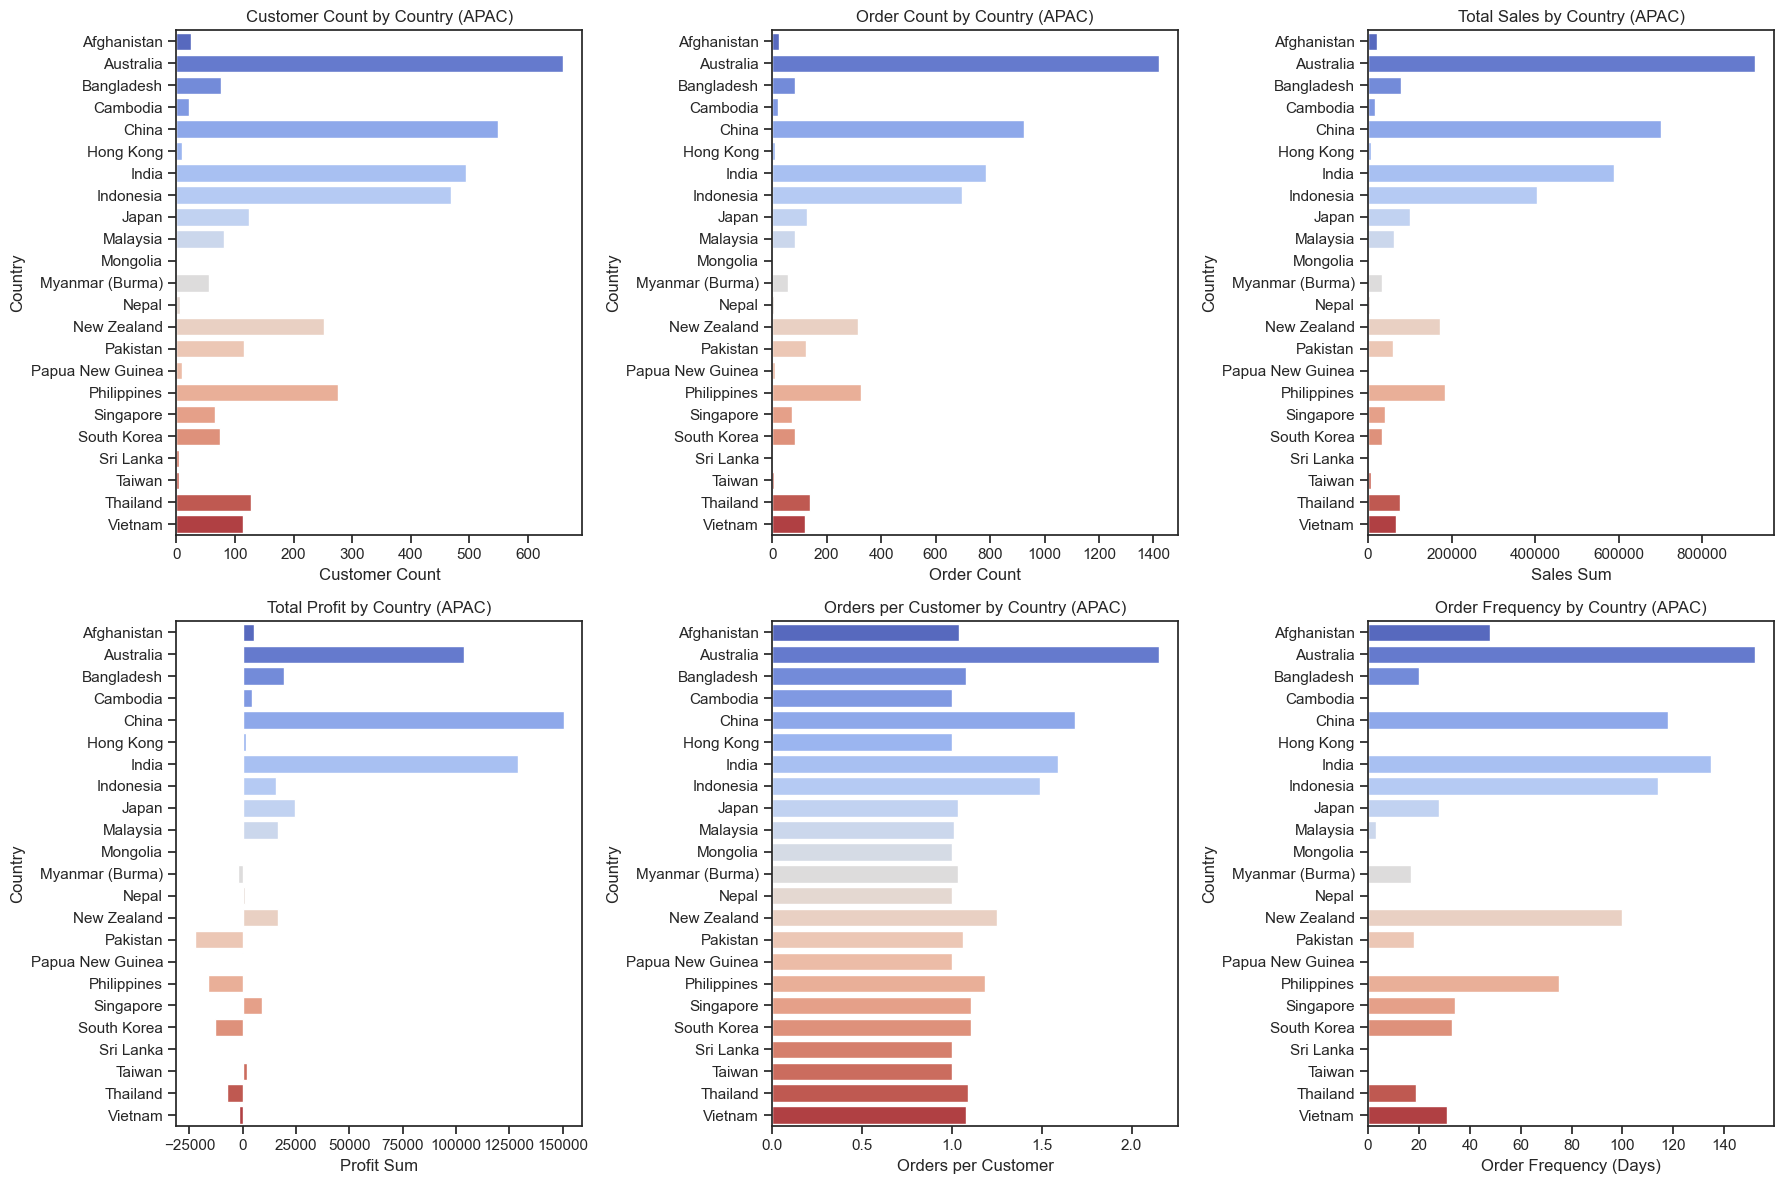

In [303]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# APAC 지역 데이터 필터링
df = pd.read_csv('superstore.csv')
df_apac = df[df['Market'] == 'APAC'].copy()

# 대륙별 고객 수, 주문 수, 이익액, 매출액
customer_count = df_apac.groupby('Country')['Customer.ID'].nunique().reset_index()
customer_count.rename(columns={'Customer.ID': 'Customer Count'}, inplace=True)

order_count = df_apac.groupby('Country')['Order.ID'].nunique().reset_index()
order_count.rename(columns={'Order.ID': 'Order Count'}, inplace=True)

profit_amount = df_apac.groupby('Country')['Profit'].sum().reset_index() 
profit_amount.rename(columns={'Profit': 'Profit Sum'}, inplace=True)

sales_amount = df_apac.groupby('Country')['Sales'].sum().reset_index()
sales_amount.rename(columns={'Sales': 'Sales Sum'}, inplace=True)

# 국가별 고객 지표 통합
country_stats = pd.merge(customer_count, order_count, on='Country')
country_stats = pd.merge(country_stats, sales_amount, on='Country')
country_stats = pd.merge(country_stats, profit_amount, on='Country')

# 인당 주문 횟수 계산 (Order Count / Customer Count)
country_stats['Orders per Customer'] = country_stats['Order Count'] / country_stats['Customer Count']

# 인당 매출액 계산 (Sales / Customer Count)
country_stats['Sales per Customer'] = country_stats['Sales Sum'] / country_stats['Customer Count']

# 인당 이익액 계산 (Profit  / Customer Count)
country_stats['Profit per Customer'] = country_stats['Profit Sum'] / country_stats['Customer Count']

# 매출액 1달러 당 이익
country_stats['Profit/Sales'] = country_stats['Profit Sum'] / country_stats['Sales Sum']

# 주문 주기 (평균 주문 간격) 계산
df_apac['Order.Date'] = pd.to_datetime(df_apac['Order.Date'])
order_intervals = df_apac.groupby(['Country', 'Customer.ID'])['Order.Date'].agg(['min', 'max', 'count'])
order_intervals['Order Frequency (Days)'] = (order_intervals['max'] - order_intervals['min']) / (order_intervals['count'] - 1)
order_intervals = order_intervals.groupby('Country')['Order Frequency (Days)'].mean().reset_index()
order_intervals['Order Frequency (Days)'] = order_intervals['Order Frequency (Days)'].dt.days

# 통합 데이터프레임 만들기
country_stats = pd.merge(country_stats, order_intervals, on='Country', how='left')

# 분석 결과 출력
print(country_stats)

# 📊 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.barplot(data=country_stats, x='Customer Count', y='Country', ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Customer Count by Country (APAC)')

sns.barplot(data=country_stats, x='Order Count', y='Country', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Order Count by Country (APAC)')

sns.barplot(data=country_stats, x='Sales Sum', y='Country', ax=axes[0, 2], palette='coolwarm')
axes[0, 2].set_title('Total Sales by Country (APAC)')

sns.barplot(data=country_stats, x='Profit Sum', y='Country', ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Total Profit by Country (APAC)')

sns.barplot(data=country_stats, x='Orders per Customer', y='Country', ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Orders per Customer by Country (APAC)')

sns.barplot(data=country_stats, x='Order Frequency (Days)', y='Country', ax=axes[1, 2], palette='coolwarm')
axes[1, 2].set_title('Order Frequency by Country (APAC)')

plt.tight_layout()
plt.show()


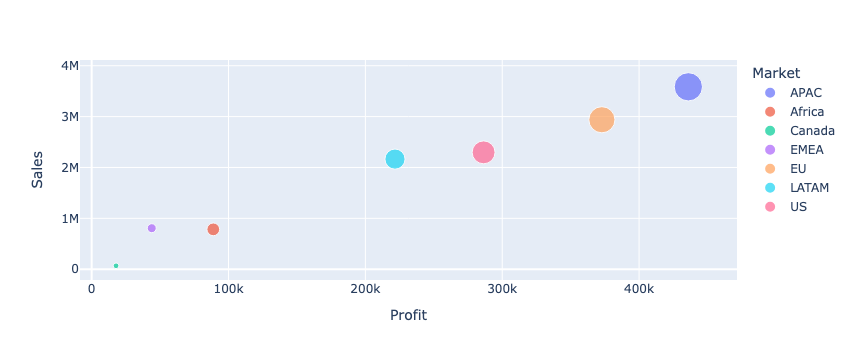

In [364]:
import plotly.express as px
df = pd.read_csv('superstore.csv')
df_copy = df[['Year', 'Market','Country', 'Sales', 'Profit', 'Discount']].copy()

# 그룹화하여 필요한 값 계산
state_sales_profit = df_copy.groupby('Market').sum().reset_index()  # 인덱스를 컬럼으로 되돌림

# 시각화
fig = px.scatter(state_sales_profit, x='Profit', y='Sales', color='Market', size='Profit', hover_data=['Sales'])
fig.show()

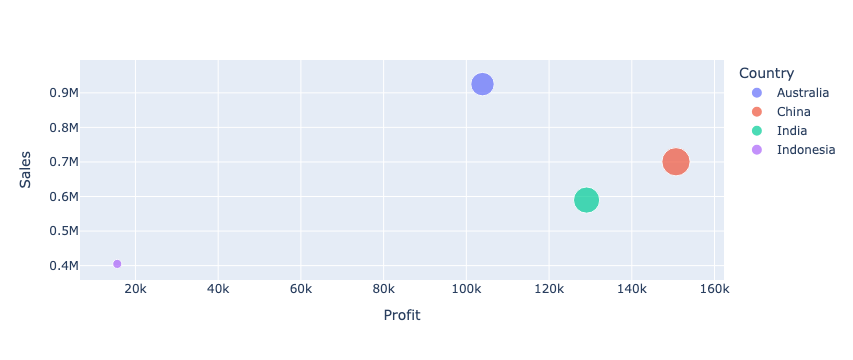

In [366]:
import plotly.express as px
df = pd.read_csv('superstore.csv')
df_copy = df[['Year', 'Market','Country', 'Sales', 'Profit', 'Discount']].copy()

apac_data = df_copy[df_copy['Market'] == 'APAC']

country_sales_profit_apac = apac_data.groupby('Country').sum().reset_index()  # 인덱스를 컬럼으로 되돌림

# 음수 Profit 값을 0으로 설정
country_sales_profit_apac['Profit'] = country_sales_profit_apac['Profit'].clip(lower=0)

top_4_countries = country_sales_profit_apac.nlargest(4, 'Sales')

# 시각화
fig = px.scatter(top_4_countries, x='Profit', y='Sales', color='Country', size='Profit', hover_data=['Sales'])
fig.show()


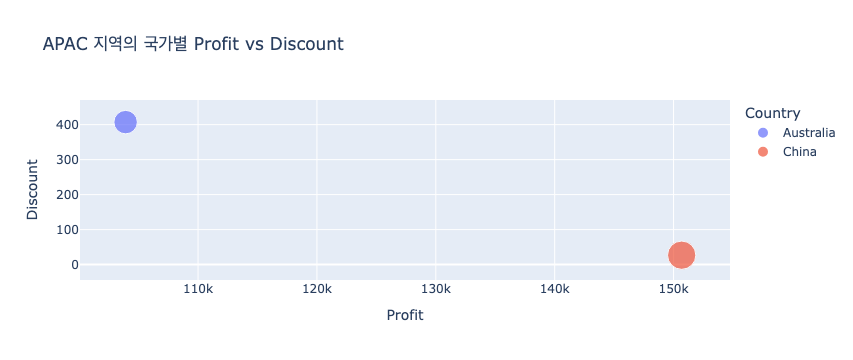

In [46]:
import pandas as pd
import plotly.express as px

# 데이터 불러오기
df = pd.read_csv('superstore.csv')
df_copy = df[['Year', 'Market', 'Country', 'Sales', 'Profit', 'Discount']].copy()

# APAC 데이터 필터링
apac_data = df_copy[df_copy['Market'] == 'APAC']

# 오스트레일리아와 중국만 선택
aus_china = apac_data[apac_data['Country'].isin(['Australia', 'China'])]

# 그룹화하여 국가별 Sales, Profit 합계 계산
country_sales_profit_apac = aus_china.groupby('Country', as_index=False)[['Sales', 'Profit', 'Discount']].sum()

# 음수 Profit 값을 0으로 설정
country_sales_profit_apac['Profit'] = country_sales_profit_apac['Profit'].clip(lower=0)

# 시각화: Profit vs Discount (국가별 크기 비교)
fig = px.scatter(country_sales_profit_apac, x='Profit', y='Discount', color='Country', 
                 size='Profit', hover_data=['Discount'],
                 title="APAC 지역의 국가별 Profit vs Discount")
fig.show()



In [398]:
summary = (aus_china_sp.groupby(['Country', 'Category']).agg({
        'Discount': 'mean',
        'Profit': 'sum',
        'Sales': 'sum'
    }).reset_index()).round(2)
summary

,Country,Category,Discount,Profit,Sales
0,Australia,Furniture,0.26,-901.34,12350.28
1,Australia,Office Supplies,0.17,168.77,1612.54
2,Australia,Technology,0.17,558.45,5569.46
3,China,Furniture,0.27,-1257.82,9329.59
4,China,Office Supplies,0.25,50.80,830.02
5,China,Technology,0.17,412.89,3484.94
